In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from plotnine import *
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r"D:\ml2\project\wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
print("the shape of Data is : ",df.shape)

the shape of Data is :  (178, 13)


In [4]:
sc=StandardScaler()

In [5]:
data_sc = sc.fit_transform(df)

In [6]:
data_sc

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Applying PCA

In [7]:
pca = PCA()
pca.fit(data_sc)
x = np.cumsum(pca.explained_variance_ratio_)
x

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [8]:
best_num = np.argmax(x >= 0.95) + 1
best_num

10

In [9]:
model = PCA(n_components= best_num)

In [10]:
data_pca=model.fit_transform(data_sc)

In [11]:
data_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         6.51390947e-02,  6.41442706e-01,  1.02095585e+00],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         1.02441595e+00, -3.08846753e-01,  1.59701372e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -3.44216131e-01, -1.17783447e+00,  1.13360857e-01],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         4.70238043e-02,  1.22214687e-03, -2.47997312e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         3.90828774e-01,  5.74476725e-02,  4.91489502e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.92913734e-01,  7.41660423e-01, -1.17969019e-01]])

In [12]:
cols=[]
for i in np.arange(best_num):
    cols.append('PCA' + str(i+1))

In [13]:
data=pd.DataFrame(data_pca,columns=(cols))

In [14]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366


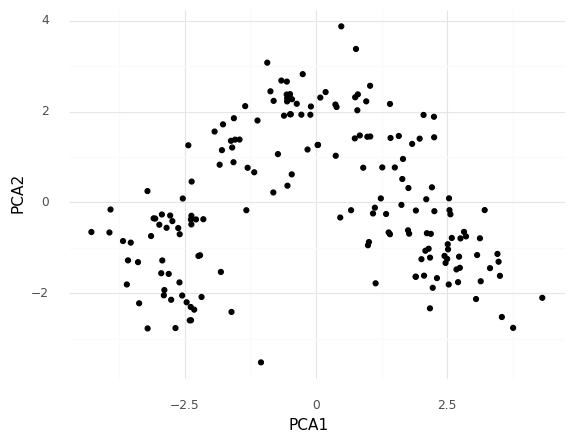

<ggplot: (99312966647)>

In [15]:
ggplot(data, aes(x = 'PCA1', y = 'PCA2')) + geom_point() + theme_minimal()

#  KMeans

In [16]:
data1=data.copy()

C:\Users\2021\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


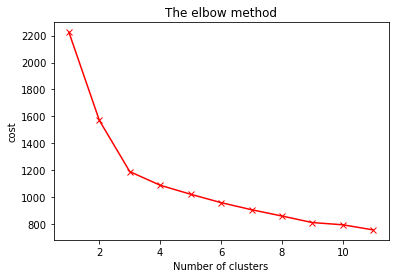

In [17]:
cost=[]

# Finding inertia on various k values
for i in range(1,12):
    kmeans=KMeans(n_clusters = i, init = 'random', 
                    max_iter = 100).fit(data_pca)
    cost.append(kmeans.inertia_)
    
plt.plot(range(1, 12), cost, 'x-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('cost') 
plt.show()

In [18]:
score = []
for n in range(2,12):
    kmean = KMeans(n_clusters= n )
    kmean.fit(data_pca)
    result = kmean.labels_
    print(n , '    '  , silhouette_score(data_sc , result))

2      0.26831340971052126
3      0.2848589191898987
4      0.2586075384934024
5      0.22833568436480142
6      0.20415252239953344
7      0.21036310534331812
8      0.16388655841190616
9      0.19927186048975026
10      0.13687040045027832
11      0.1413854664743805


In [19]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100)

y_kmeans = kmeans.fit_predict(data_pca)

In [20]:
kmeans.n_iter_

6

In [21]:
index=kmeans.labels_

In [22]:
index

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

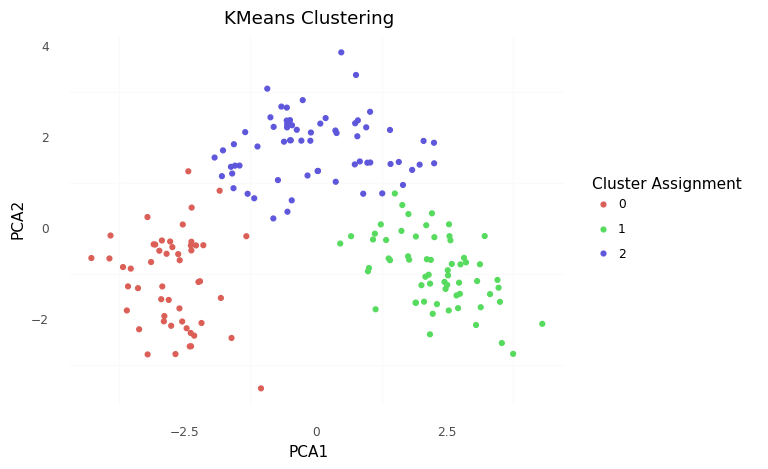

<ggplot: (99313089774)>

In [23]:
data1["k_labels"] = kmeans.labels_
(ggplot(data1, aes(x = "PCA1", y = "PCA2", color = "factor(k_labels)")) +
  geom_point() +
  theme_minimal() +
  scale_color_discrete(name = "Cluster Assignment")+
  theme(panel_grid_major = element_blank()) +
labs(title = "KMeans Clustering"))

In [24]:
print("silhouette_score is equal : ",silhouette_score(data_pca,index))

silhouette_score is equal :  0.29867482943692897


# Hierarchical and plot

In [25]:
data2=data.copy()

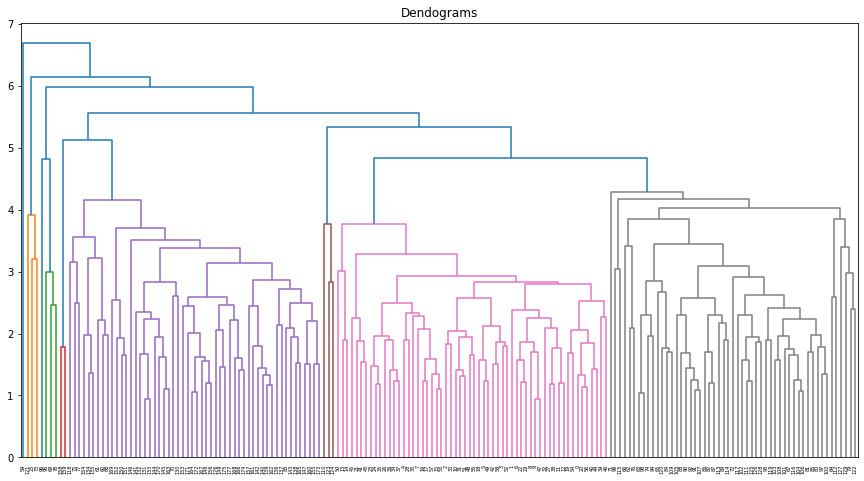

In [26]:
plt.figure(figsize=(15, 8))
plt.title("Dendograms")
dend = sch.dendrogram(sch.linkage(y=data_pca, method='average',metric='euclidean'),orientation='top') 

In [27]:
h1=AgglomerativeClustering(n_clusters=3)

In [28]:
h1.fit(data_pca)

AgglomerativeClustering(n_clusters=3)

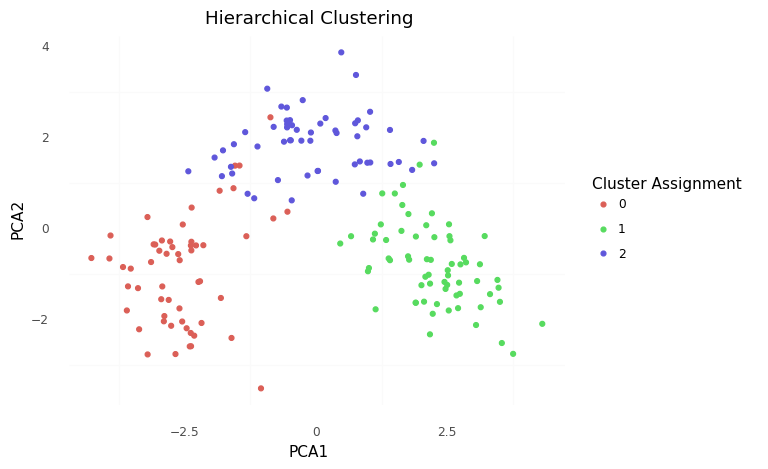

<ggplot: (99314470991)>

In [29]:
data2["h_labels"] = h1.labels_
(ggplot(data2, aes(x = "PCA1", y = "PCA2", color = "factor(h_labels)")) +
  geom_point() +
  theme_minimal() +
  scale_color_discrete(name = "Cluster Assignment")+
  theme(panel_grid_major = element_blank()) +
labs(title = "Hierarchical Clustering"))

In [30]:
print("silhouette_score is equal : ",silhouette_score(data_pca,h1.labels_))

silhouette_score is equal :  0.2839520778138408


# DBscan and plot

In [31]:
data3=data.copy()

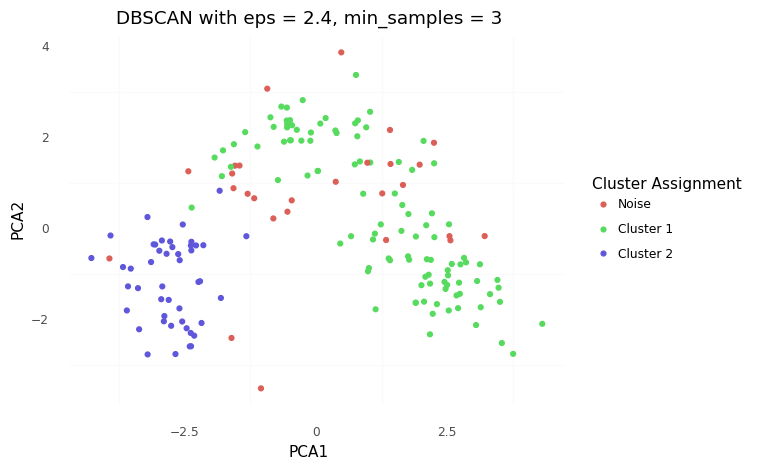

<ggplot: (99314668487)>

In [32]:
db1 = DBSCAN(eps = 2.4, min_samples =7).fit(data_pca)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

data3["assignments"] = db1.labels_

(ggplot(data3, aes(x = 'PCA1', y = 'PCA2', color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 2.4, min_samples = 3"))

In [33]:
print("silhouette_score is equal : ",silhouette_score(data_pca,db1.labels_))

silhouette_score is equal :  0.22941013942386435


# GaussianMixture

In [34]:
data4=data.copy()

In [35]:
GM = GaussianMixture(3)

In [36]:
GM.fit(data_pca)

GaussianMixture(n_components=3)

In [37]:
data4["GM"] = GM.predict(data_pca)

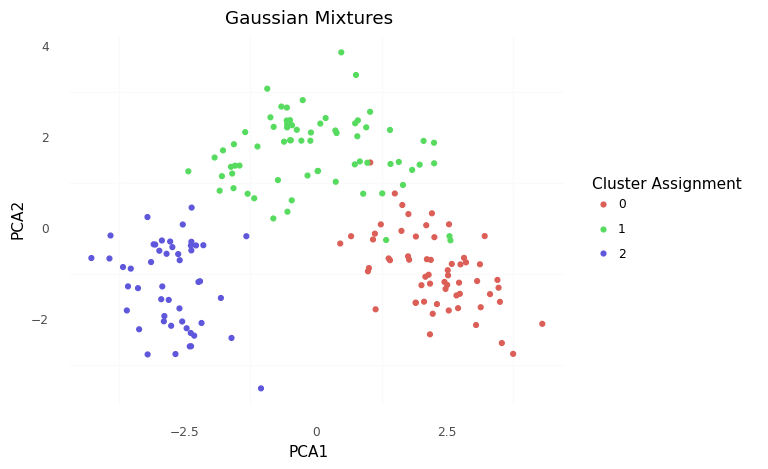

<ggplot: (99314565717)>

In [38]:
(ggplot(data4, aes(x = 'PCA1', y = 'PCA2',color = "factor(GM)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment") +
 theme(panel_grid_major = element_blank()) + 
 labs(title = "Gaussian Mixtures"))

In [39]:
print("silhouette_score is equal : ",silhouette_score(data_pca,data4["GM"]))

silhouette_score is equal :  0.2937407026605512
